<a href="https://colab.research.google.com/github/taoducminh/AIO-Exercise/blob/feature%2Fexercise-module2-week2/Module_2_Week_2_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Các phép toán trên vector và ma trận.

##1.1. Length of a vector

In [8]:
import numpy as np

def compute_vector_length(vector):
    len_of_vector = np.sqrt(np.sum(np.square(vector)))
    return len_of_vector

##1.2. Dot product

In [9]:
import numpy as np

def compute_dot_product(vector1, vector2):
    result = np.dot(vector1, vector2)
    return result

##1.3. Multiplying a vector by a matrix

In [10]:
import numpy as np

def matrix_multi_vector(matrix, vector):
    result = np.dot(matrix, vector)
    return result

##1.4. Multiplying a matrix by a matrix

In [11]:
import numpy as np

def matrix_multi_matrix(matrix1, matrix2):
    result = np.dot(matrix1, matrix2)
    return result

##1.5 Matrix inverse

In [12]:
import numpy as np

def inverse_matrix(matrix):
    result = np.linalg.inv(matrix)
    return result

#2. Eigenvector và eigenvalues:

In [13]:
import numpy as np

def compute_eigenvalues_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    # Normalize eigenvectors
    eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

    return eigenvalues, eigenvectors

#3. Cosine Similarity:

In [14]:
import numpy as np

def compute_cosine(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    cos_sim = dot_product / (norm_v1 * norm_v2)
    return cos_sim

#4. Background subtraction (tách nền):

##(a) Resize các ảnh đầu vào về cùng kích thước:

In [15]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

# Resize images
bg1_image = cv2.imread('/content/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('/content/Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('/content/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

##(b) Xây dựng hàm compute_difference():

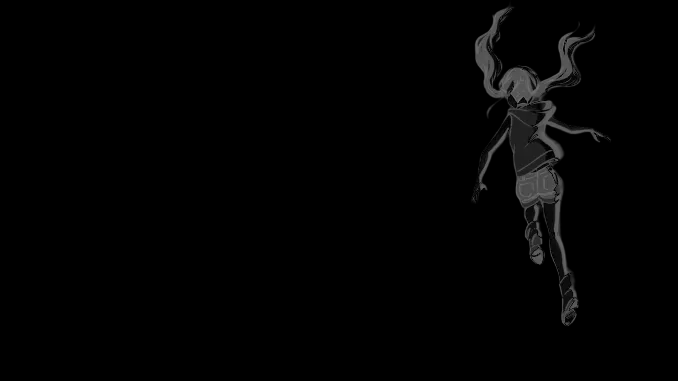

In [18]:
def compute_difference(bg_img, input_img):
    # Convert images to grayscale
    gray_bg = cv2.cvtColor(bg_img, cv2.COLOR_BGR2GRAY)
    gray_input = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference
    difference_single_channel = cv2.absdiff(gray_bg, gray_input)

    return difference_single_channel

# Display the difference
difference_single_channel = compute_difference(bg1_image, ob_image)
cv2_imshow(difference_single_channel)

##(c) Xây dựng hàm compute_binary_mask():

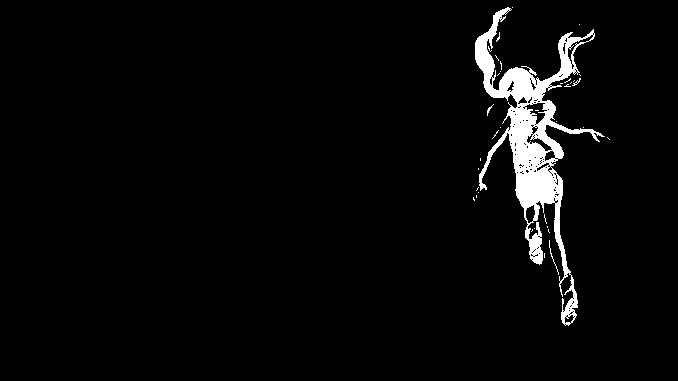

In [19]:
def compute_binary_mask(difference_single_channel):
    # Threshold the difference image to create a binary mask
    _, difference_binary = cv2.threshold(difference_single_channel, 30, 255, cv2.THRESH_BINARY)

    return difference_binary

# Display the binary mask
binary_mask = compute_binary_mask(difference_single_channel)
cv2_imshow(binary_mask)

##(d) Xây dựng hàm replace_background():

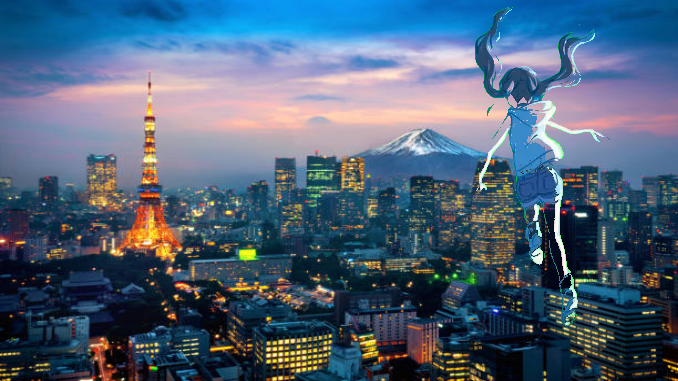

In [20]:
def replace_background(bg1_image, bg2_image, ob_image):
    # Compute the difference
    difference_single_channel = compute_difference(bg1_image, ob_image)

    # Compute the binary mask
    binary_mask = compute_binary_mask(difference_single_channel)

    # Replace the background
    output = np.where(binary_mask[:, :, np.newaxis] == 255, ob_image, bg2_image)

    return output

# Replace the background and display the result
result_image = replace_background(bg1_image, bg2_image, ob_image)
cv2_imshow(result_image)

# MCQs

In [21]:
vector = np.array([-2, 4, 9, 21])
result = compute_vector_length([vector])
print(round(result, 2))

23.28


In [22]:
v1 = np.array([0, 1, -1, 2])
v2 = np.array([2, 5, 1, 0])
result = compute_dot_product(v1, v2)
print(round(result, 2))

4


In [23]:
x = np.array([[1, 2], [3, 4]])
k = np.array([1, 2])
print('result \n', x.dot(k))

result 
 [ 5 11]


In [24]:
x = np.array([[-1, 2], [3, -4]])
k = np.array([1, 2])
print('result \n', x @ k)

result 
 [ 3 -5]


In [25]:
m = np.array([[-1, 1, 1], [0, -4, 9]])
v = np.array([0, 2, 1])
result = matrix_multi_vector(m, v)
print(result)

[3 1]


In [26]:
m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3], [6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(result)

[[  6  -1]
 [-16 -10]]


In [27]:
m1 = np.eye(3)
m2 = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
result = m1 @ m2
print(result)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [28]:
m1 = np.eye(2)
m1 = np.reshape(m1, (-1, 4))[0]
m2 = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1 @ m2
print(result)

[5. 5. 5. 5.]


In [29]:
m1 = np.array([[1, 2], [3, 4]])
m1 = np.reshape(m1, (-1, 4), "F")[0]
m2 = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1 @ m2
print(result)

[29 29 29 29]


In [30]:
m1 = np.array([[-2, 6], [8, -4]])
result = inverse_matrix(m1)
print(result)

[[0.1  0.15]
 [0.2  0.05]]


In [31]:
matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print(eigenvectors)

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [32]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x, y)
print(round(result, 3))

0.577
